<a href="https://colab.research.google.com/github/sagihaider/BibTeX_2_BibItem/blob/master/CE888ProjectAllocationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/sagihaider/project_allocation.git 

Cloning into 'project_allocation'...
fatal: could not read Username for 'https://github.com': No such device or address


In [11]:
import pandas as pd 
data = pd.read_excel('/content/CE888_Project_allocation_2021_Responses.xlsx', index_col=0)  
df = data.iloc[:,[0,1,2,3,4]]
df.reset_index(drop=True, inplace=True)
df.columns = ['name','userid','project1', 'project2','project3']
df.count()
# print(df.dtypes)

name        160
userid      160
project1    158
project2    160
project3    157
dtype: int64

In [18]:
p1 = [] # List for Project 1 allocation
p2 = [] # List for Project 2 allocation
p3 = [] # List for Project 3 allocation
# df.iloc[1, 3]
[nStudent, nCol] = df.shape # no.of students, no.of Columns
for count, value in enumerate(df['name']):
  # print(count, value)
  cs1=df.iloc[count, 2] # Fetch project 1 choice
  cs2=df.iloc[count, 3] # Fetch project 2 choice
  cs3=df.iloc[count, 4] # Fetch project 3 choice

  if cs1 == 'First option': # If project 1 is first option
    p1.append(value)        # then append to project 1
    if len(p1) >= round(nStudent/3,0):
      if cs2 == 'Second option':
        p2.append(value)
      elif cs2 == 'Third option':
        p3.append(value)
        
  elif cs2 == 'First option': # If project 2 is first option
    p2.append(value)          # then append to project 2
    if len(p2) >= round(nStudent/3,0):
      if cs1 == 'First option':
        p1.append(value)
      elif cs3 == 'Third option':
        p3.append(value)

  elif cs3 == 'First option': # If project 3 is first option
    p3.append(value)          # then append to project 3
    if len(p3) >= round(nStudent/3,0):
      if cs1 == 'First option':
        p1.append(value)
      elif cs2 == 'Second option':
        p2.append(value)

print(len(p1))
print(len(p2))
print(len(p3))

97
74
24


In [19]:
p1 = [] # List for Project 1 allocation
p2 = [] # List for Project 2 allocation
p3 = [] # List for Project 3 allocation
# df.iloc[1, 3]
[nStudent, nCol] = df.shape # no.of students, no.of Columns
print(nStudent/3)
for count, value in enumerate(df['name']):
  # print(count, value)
  cs1=df.iloc[count, 2] # Fetch project 1 choice
  cs2=df.iloc[count, 3] # Fetch project 2 choice
  cs3=df.iloc[count, 4] # Fetch project 3 choice

  if cs1 == 'First option': # If project 1 is first option
    if len(p1) <= round(nStudent/3,0):
      p1.append(value)        # then append to project 1
    elif cs2 == 'Second option':
      if len(p2) <= round(nStudent/3,0):
        p2.append(value) 
    elif cs3 == 'Second option':
      if len(p3) <= round(nStudent/3,0):
        p3.append(value)
    

  elif cs2 == 'First option': # If project 2 is first option
    if len(p2) <= round(nStudent/3,0):
      p2.append(value)        # then append to project 1
    elif len(p1) <= round(nStudent/3,0):
      p1.append(value) 
    elif len(p3) <= round(nStudent/3,0):
      p3.append(value)


  elif cs3 == 'First option': # If project 3 is first option
    if len(p3) <= round(nStudent/3,0):
      p3.append(value)        # then append to project 1
    elif len(p2) <= round(nStudent/3,0):
      p2.append(value) 
    elif len(p3) <= round(nStudent/3,0):
      p3.append(value)

print(len(p1))
print(len(p2))
print(len(p3))

53.333333333333336
54
54
41


First option     85
Third Option     28
Second option    26
Name: project1, dtype: int64
Second option    82
First option     33
Third Option     26
Name: project2, dtype: int64
Third Option     84
Second option    31
First option     23
Name: project3, dtype: int64


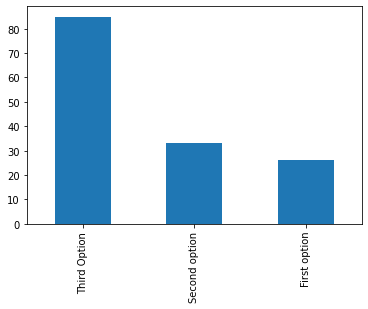

In [31]:
count_p1 = df['project1'].value_counts() 
print(count_p1) 
count_p1.plot(kind='bar')